In [1]:
# Cell 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

In this cell, i will be data loading the world dataset is loaded. Index will be stored as a variable to verify that sampling worked (more on this later).

In [2]:
import pandas as pd
world = pd.read_csv('C:/Users/daisy/Desktop/data/world.csv')
#world.map(lambda x: x.replace('world-','')).astype('category')
#world['id'] = world.index
print(world.head())

  Organization Fiscal Year  Commitments (total) (US$, millions)  \
0         IBRD        FY06                                14135   
1         IBRD        FY07                                12829   
2         IBRD        FY08                                13468   
3         IBRD        FY09                                32911   
4         IBRD        FY10                                44197   

   Commitments (development policy lending) (US$, millions)  \
0                                               4906          
1                                               3635          
2                                               3967          
3                                              15532          
4                                              20588          

   Gross Disbursements (total) (US$, millions)  \
0                                        11833   
1                                        11055   
2                                        10490   
3                 

In [3]:
random_state = RandomState(seed=42)
world = world.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(world.head())
world = world.fillna(0)
print(world.head())

  Organization Fiscal Year  Commitments (total) (US$, millions)  \
0         IBRD        FY06                                14135   
1          IDA        FY14                                22239   
2          IDA        FY12                                14753   
3         IBRD        FY07                                12829   
4         IBRD        FY14                                18604   

   Commitments (development policy lending) (US$, millions)  \
0                                               4906          
1                                               2489          
2                                               1827          
3                                               3635          
4                                               7997          

   Gross Disbursements (total) (US$, millions)  \
0                                        11833   
1                                        13432   
2                                        11061   
3                 

In [4]:
train_split, test_split = train_test_split(world, train_size=0.8, random_state=random_state)
print(train_split.groupby('Fiscal Year').size())
print(test_split.groupby('Fiscal Year').size())

Fiscal Year
FY06    2
FY07    2
FY08    2
FY09    1
FY10    2
FY11    1
FY12    1
FY13    1
FY14    2
FY15    2
dtype: int64
Fiscal Year
FY09    1
FY11    1
FY12    1
FY13    1
dtype: int64


In [5]:
world['Organization_cat'] = world['Organization'].astype('category')
#world['Organization_cat'] = world['Organization_cat'].cat.codes
print(world['Organization_cat'].value_counts())

tree = DecisionTreeClassifier(random_state=random_state)
train_data = train_split.drop(['Fiscal Year','Organization'], axis=1)
train_target = train_split['Fiscal Year']
fitted_tree = tree.fit(train_data, train_target)
print(export_text(fitted_tree, feature_names=list(train_data.columns)))


IDA     10
IBRD    10
Name: Organization_cat, dtype: int64
|--- Net Disbursements (US$, millions) <= 8582.50
|   |--- Commitments (total) (US$, millions) <= 14444.00
|   |   |--- Gross Disbursements (total) (US$, millions) <= 8744.50
|   |   |   |--- class: FY07
|   |   |--- Gross Disbursements (total) (US$, millions) >  8744.50
|   |   |   |--- Net Disbursements (US$, millions) <= -4148.00
|   |   |   |   |--- class: FY07
|   |   |   |--- Net Disbursements (US$, millions) >  -4148.00
|   |   |   |   |--- Operating Income (US$, millions) <= 2005.50
|   |   |   |   |   |--- Development Grant Expenses (US$, millions) <= 2545.00
|   |   |   |   |   |   |--- class: FY06
|   |   |   |   |   |--- Development Grant Expenses (US$, millions) >  2545.00
|   |   |   |   |   |   |--- class: FY08
|   |   |   |   |--- Operating Income (US$, millions) >  2005.50
|   |   |   |   |   |--- class: FY08
|   |--- Commitments (total) (US$, millions) >  14444.00
|   |   |--- Usable Capital and Reserves (US$,

In [6]:
#world.info()

In [7]:
# Cell 6
test_data = test_split.drop(['Fiscal Year','Organization'], axis=1)
test_target = test_split['Fiscal Year']
result_data = test_split.copy()
result_data['PredictedValue'] = fitted_tree.predict(test_data)
result_data['Prediction'] = result_data.apply(lambda x: x['Fiscal Year'].capitalize() if x['Fiscal Year'] == x['PredictedValue'] else 'Classification failure', axis=1)

In [9]:
# Cell 7
confusion_matrix(result_data['PredictedValue'], result_data['Fiscal Year'])
accuracy_score(result_data['PredictedValue'], result_data['Fiscal Year'])

0.0

<AxesSubplot:xlabel='Loans Outstanding (US$, millions)', ylabel='Commitments (total) (US$, millions)'>

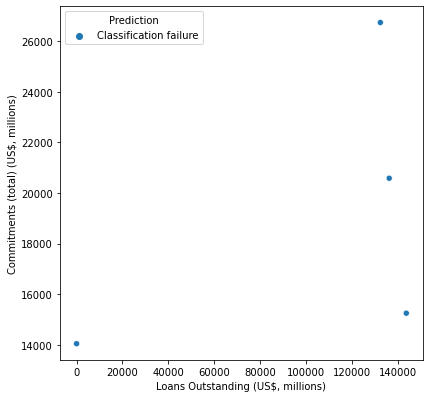

In [11]:
# Cell 8
fiscal_plot, fiscal_plot_ax = plt.subplots(figsize=(6.5, 6.5))
sb.scatterplot(x='Loans Outstanding (US$, millions)', y='Commitments (total) (US$, millions)', data=test_data, hue=result_data['Prediction'])
#petal_plot, petal_plot_ax = plt.subplots(figsize=(6.5, 6.5))
#sb.scatterplot(x='Petal.Width', y='Petal.Length', data=test_data, hue=result_data['Prediction'])